In [1]:
import pandas as pd

In [49]:
path = 'data/processed'
df = pd.read_csv(path+"/COVID19_ZM_transformedTweets.csv")
print(df.shape)
df.head(1)

(7338, 12)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,retweets,username,date,Hashtags,geo,Sentiment,SentimentClass
0,0,0,0,1244410016347475968,Zambia reports 29 COVID-19 cases as one more c...,0,zambia_travels,2020-03-29 23:44:02+00:00,NaN,NaN,0.45,Positive


In [50]:
df['created_at'] =  pd.to_datetime(df['date'])
df['date'] =  pd.to_datetime(df['created_at']).dt.date
df=df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)
df.head(1)

,id,text,retweets,username,date,Hashtags,geo,Sentiment,SentimentClass,created_at
0,1244410016347475968,Zambia reports 29 COVID-19 cases as one more c...,0,zambia_travels,2020-03-29,NaN,NaN,0.45,Positive,2020-03-29 23:44:02+00:00


In [120]:
get_tweets=get_tweet_for_specific_range("2020-03-17","2020-03-24")

merged_text_col=merge_df_col_val(get_tweets["text"])
remove_RT_from_text=remove_RT(merged_text_col)
punct_rmvd_from_txt=remove_punct_marks(merged_text_col)
stp_wrds_rmvd_from_txt=remove_stop_words(punct_rmvd_from_txt)
meanless_wrds_rmvd_from_txt=remove_meaninglesswords(stp_wrds_rmvd_from_txt)
rmv_numbers_from_txt=remove_numeric(meanless_wrds_rmvd_from_txt)

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

#create freq and dist plot
tweet_txt=rmv_numbers_from_txt
words=tweet_txt.split(" ")
nlp_words=nltk.FreqDist(words).most_common(20)

df_freq=pd.DataFrame(nlp_words, columns=['word', 'frequency'])
df_freq.head()

,word,frequency
0,close,156
1,borders,144
2,airport,126
3,sign,122
4,petition,116


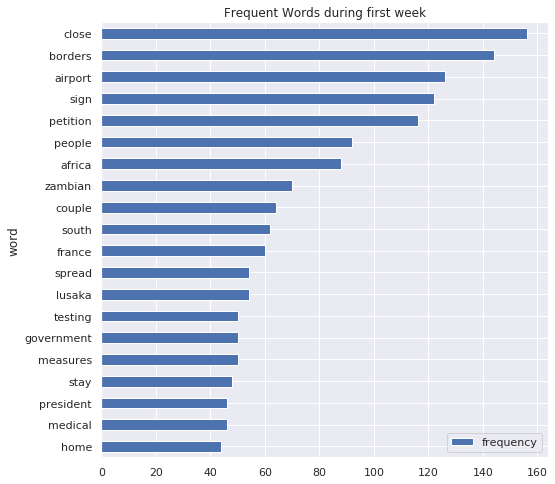

In [122]:
fig,ax=plt.subplots(figsize=(8,8))

df_freq.sort_values(by='frequency').plot.barh(x="word",y="frequency",ax=ax)
ax.set_title("Frequent Words during first week")
plt.show()

In [5]:
import nltk
nltk.download('stopwords')

sw=nltk.corpus.stopwords.words('english')

def remove_stop_words(txt):
    words= txt.split(" ")
    words_ns=[]
    
    for word in words:
        if word not in sw:
            words_ns.append(word)
    
    return list_to_str(words_ns)

[nltk_data] Downloading package stopwords to /home/yas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def remove_numeric(txt):
    words=txt.split(" ")
    words_ns=[]
    
    for word in words:
        if word.isnumeric() == False:
            words_ns.append(word)
    return list_to_str(words_ns)

In [7]:
def list_to_str(lst):
    nwstr=""
    for i in lst:
        nwstr+=i+" "
        
    return nwstr

In [8]:
def get_nouns(txt):
    nouns=['NNP','NN']
    new_tagged=[]
    
    text = word_tokenize(txt)
    tagged = nltk.pos_tag(text) 
    
    for tag in tagged:
        if tag[1] in nouns:
            new_tagged.append(tag[0])

    return list_to_str(new_tagged)
  

In [119]:
def remove_meaninglesswords(txt):
    words=txt.split(" ")
    meanless_words=['rt','http','https','www','amp','dr','com', \
                    'today','health','minister','covid_19','like', \
                    'covid-19','zambia','covid','coronavirus','country', \
                    'via','us','chng','cases','case','first','countries',\
                    'two','amid','must','confirm','confirmed','virus',\
                   'time','covid19','news','update','let','confirms', \
                    'ministry','zimbabwe','corona']
    words_ns=[]
    
    for word in words:
        if word not in meanless_words:
            words_ns.append(word)
    
    return list_to_str(words_ns)

In [10]:
def remove_RT(txt):
    words=txt.split(" ")
    words_ns=[]
    
    for word in words:
        if '@' not in word:
            words_ns.append(word)
    
    return list_to_str(words_ns)

In [11]:
def merge_df_col_val(txt_col):
    newstr=""
    for t in txt_col.values.flatten():
        newstr+=t.lower() + ''
    return newstr

In [12]:
import re

def remove_punct_marks(txt):
    lst= re.findall('\w+',txt)
    
    return list_to_str(lst)

In [54]:
def get_tweet_for_specific_range(str_strt_date,str_end_date):
    strt=pd.to_datetime(str_strt_date).date()
    end=pd.to_datetime(str_end_date).date()
    return df[(df["date"]>=strt) & (df["date"]<=end)]

In [94]:
rmv_numbers_from_txt

'really want wait poeple start dying like chickens till accept lockdown hospitals could easily get overwhelmed even without still cure paracetamol records report sabc radio service channel africa follow link listen given samples could tested one day barely test passengers stepping plane positive patient moment really need think scaling testing methods country wow hester come visit yea find travelled swearing ceremony came back went straight press briefing next mingles everyone plus family surprises rich kid attitude shipment materials acquired support jackma alibabagroup heading south africa burundi rwanda togo zimbabwe kenya nigeria south sudan staysafeit said government giving false information public putting country risk covid19zambia southernafrica countries past sunday angola eswatini namibia mozambique south africa zimbabwe boarder closures lock downs mandatory quarantine taking effect countries neighborsjoin worshiping god look topic finding courage midst live world vision faceb